<a href="https://colab.research.google.com/github/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/blob/main/RSG_MuSeRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
%%capture
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://russiansuperglue.com/tasks/download/MuSeRC" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

In [2]:
# Load necessary code files and models from https://github.com/RussianNLP/RussianSuperGLUE 
# to recreate TfIdf baseline

%%capture
%%bash
# load tfidf pickle created by RSG team
wget -q --show-progress "https://russiansuperglue.com/tasks/tf_idf" -O temp.zip
unzip temp.zip -d data
rm temp.zip

# Make sure you donwload with the raw file link
# Keep the link relevant to your dataset
wget -q --show-progress "https://github.com/RussianNLP/RussianSuperGLUE/raw/master/tfidf_baseline/MuSeRC.py" -O MuSeRC.py

# Load modules to solve this dataset tasks
wget -q --show-progress "https://github.com/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/raw/main/base.py" -O base.py
wget -q --show-progress "https://github.com/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/raw/main/utils.py" -O utils.py
wget -q --show-progress "https://github.com/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/raw/main/Solvers/MuSeRCSolver.py" -O MuSeRCSolver.py

In [3]:
%%capture
%%bash
# add tree package for fancy directory display
apt-get install tree

In [4]:
# display the content of the folder
!tree

.
├── base.py
├── data
│   ├── MuSeRC
│   │   ├── test.jsonl
│   │   ├── train.jsonl
│   │   └── val.jsonl
│   └── tfidf.pkl
├── MuSeRC.py
├── MuSeRCSolver.py
└── utils.py

2 directories, 8 files


# Solve MuSeRC with Heuristics

In [5]:
%%capture
# to lemmantize, install these two dependancies
!pip3 install pyMorphy2[fast]
!pip3 install razdel
!pip3 install jsonlines

In [11]:
import numpy as np
from MuSeRCSolver import MuSeRCSolver
from MuSeRC import MuSeRC_metrics

solver = MuSeRCSolver(path='data/MuSeRC/train.jsonl') # pass a dataset to get stats
solver.preprocess_valid('data/MuSeRC/val.jsonl') # pass a dataset to solve
solver.get_stats_MuSeRC()

SEEDS = [42, 23, 1234567]

## All Heuristics at once

In [33]:
print('All heuristics + Majority Class')
y_true, y_pred = solver.heuristics()
em, f1a = MuSeRC_metrics(y_pred, y_true)

print(f"EM score is: {em}")
print(f"F1-a score is: {f1a}")

All heuristics + Majority Class
Heuristics appears for 1722 samples, 1180 of them correct
EM score is: 0.20226843100189035
F1-a score is: 0.6642032332563511


In [13]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RANDOM')
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'All heuristics + Random choice')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 1722 samples, 1180 of them correct
Heuristics appears for 1722 samples, 1180 of them correct
Heuristics appears for 1722 samples, 1180 of them correct
All heuristics + Random choice
Average EM score over 3 experiments: 0.17076244486452427
Average F1-a score over 3 experiments: 0.6685073442836286


In [14]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RB')
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'All heuristics + Random balanced choice')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 1722 samples, 1180 of them correct
Heuristics appears for 1722 samples, 1180 of them correct
Heuristics appears for 1722 samples, 1180 of them correct
All heuristics + Random balanced choice
Average EM score over 3 experiments: 0.18336483931947067
Average F1-a score over 3 experiments: 0.6695506140200531


## Answer is shorter than 3 words leads to False

In [15]:
print('Short answer + Majority Class')
y_true, y_pred = solver.heuristics(heuristic={'0': 'short answer'})
print(MuSeRC_metrics(y_pred, y_true))

Short answer + Majority Class
Heuristics appears for 1037 samples, 673 of them correct
(0.0, 0.0)


In [16]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RANDOM',
                                       heuristic={'0': 'short answer'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'Short + Random choice')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 1037 samples, 673 of them correct
Heuristics appears for 1037 samples, 673 of them correct
Heuristics appears for 1037 samples, 673 of them correct
Short + Random choice
Average EM score over 3 experiments: 0.06490233144297415
Average F1-a score over 3 experiments: 0.40339502805751964


In [17]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RB',
                                       heuristic={'0': 'short answer'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'Short + Random balanced choice')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 1037 samples, 673 of them correct
Heuristics appears for 1037 samples, 673 of them correct
Heuristics appears for 1037 samples, 673 of them correct
Short + Random balanced choice
Average EM score over 3 experiments: 0.05356017643352237
Average F1-a score over 3 experiments: 0.3575261727424522


## Long Answer leads to True

In [18]:
print('Long answer + Majority class')
y_true, y_pred = solver.heuristics(heuristic={'1': 'long answer'})
print(MuSeRC_metrics(y_pred, y_true))

Long answer + Majority class
Heuristics appears for 231 samples, 167 of them correct
(0.07561436672967864, 0.272875816993464)


In [19]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RANDOM',
                                       heuristic={'1': 'long answer'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'Long answer + Random choice')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 231 samples, 167 of them correct
Heuristics appears for 231 samples, 167 of them correct
Heuristics appears for 231 samples, 167 of them correct
Long answer + Random choice
Average EM score over 3 experiments: 0.08506616257088846
Average F1-a score over 3 experiments: 0.5301813078883945


In [20]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RB',
                                       heuristic={'1': 'long answer'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'Short + Random balanced choice')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 231 samples, 167 of them correct
Heuristics appears for 231 samples, 167 of them correct
Heuristics appears for 231 samples, 167 of them correct
Short + Random balanced choice
Average EM score over 3 experiments: 0.07750472589792061
Average F1-a score over 3 experiments: 0.5086259901599686


## Lemmas do not overlap in answer and passage -> False

In [21]:
print('No overlap + Majority Class')
y_true, y_pred = solver.heuristics(heuristic={'0': 'no overlap'})
print(MuSeRC_metrics(y_pred, y_true))

No overlap + Majority Class
Heuristics appears for 221 samples, 197 of them correct
(0.0, 0.0)


In [22]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RANDOM',
                                       heuristic={'0': 'no overlap'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'No overlap + Random')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 221 samples, 197 of them correct
Heuristics appears for 221 samples, 197 of them correct
Heuristics appears for 221 samples, 197 of them correct
No overlap + Random
Average EM score over 3 experiments: 0.08506616257088846
Average F1-a score over 3 experiments: 0.4788727533371928


In [23]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RB',
                                       heuristic={'0': 'no overlap'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'No overlap + Random Balanced')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 221 samples, 197 of them correct
Heuristics appears for 221 samples, 197 of them correct
Heuristics appears for 221 samples, 197 of them correct
No overlap + Random Balanced
Average EM score over 3 experiments: 0.07939508506616257
Average F1-a score over 3 experiments: 0.4444426885284028


## N of overlaping lemmas in an answer and a passage is > a mean size of the answer -> True

In [24]:
print('much overlap + Majority class')
y_true, y_pred = solver.heuristics(heuristic={'1': 'much overlap'})
print(MuSeRC_metrics(y_pred, y_true))

much overlap + Majority class
Heuristics appears for 422 samples, 312 of them correct
(0.11720226843100189, 0.44098939929328623)


In [25]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RANDOM',
                                       heuristic={'1': 'much overlap'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'much overlap + Random choise')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 422 samples, 312 of them correct
Heuristics appears for 422 samples, 312 of them correct
Heuristics appears for 422 samples, 312 of them correct
much overlap + Random choise
Average EM score over 3 experiments: 0.09073724007561436
Average F1-a score over 3 experiments: 0.562247041938763


In [26]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RB',
                                       heuristic={'1': 'much overlap'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'much overlap + Random Balanced choise')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 422 samples, 312 of them correct
Heuristics appears for 422 samples, 312 of them correct
Heuristics appears for 422 samples, 312 of them correct
much overlap + Random Balanced choise
Average EM score over 3 experiments: 0.0945179584120983
Average F1-a score over 3 experiments: 0.5506375243495781


## All lemmas in an answer overlap a passage -> True

In [27]:
print('total overlap + Majority class')
y_true, y_pred = solver.heuristics(heuristic={'1': 'total overlap'})
print(MuSeRC_metrics(y_pred, y_true))

total overlap + Majority class
Heuristics appears for 877 samples, 516 of them correct
(0.1285444234404537, 0.5518716577540107)


In [28]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RANDOM',
                                       heuristic={'1': 'total overlap'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'total overlap + Random choise')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 877 samples, 516 of them correct
Heuristics appears for 877 samples, 516 of them correct
Heuristics appears for 877 samples, 516 of them correct
total overlap + Random choise
Average EM score over 3 experiments: 0.06931316950220542
Average F1-a score over 3 experiments: 0.593778805325113


In [29]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RB',
                                       heuristic={'1': 'total overlap'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'total overlap + Random balanced choise')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 877 samples, 516 of them correct
Heuristics appears for 877 samples, 516 of them correct
Heuristics appears for 877 samples, 516 of them correct
total overlap + Random balanced choise
Average EM score over 3 experiments: 0.07057340894770005
Average F1-a score over 3 experiments: 0.5867010015441282


## N of overlaping lemmas in an answer and a passage is 1 -> True

In [30]:
print('little overlap + Majority class')
y_true, y_pred = solver.heuristics(heuristic={'0': 'little overlap'})
print(MuSeRC_metrics(y_pred, y_true))

little overlap + Majority class
Heuristics appears for 415 samples, 288 of them correct
(0.0, 0.0)


In [31]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RANDOM',
                                       heuristic={'0': 'little overlap'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'little overlap + Random choise')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 415 samples, 288 of them correct
Heuristics appears for 415 samples, 288 of them correct
Heuristics appears for 415 samples, 288 of them correct
little overlap + Random choise
Average EM score over 3 experiments: 0.08380592312539382
Average F1-a score over 3 experiments: 0.45571264822662033


In [32]:
em_metrics = []
f1a_metrics = []
for seed in SEEDS:
    y_true, y_pred = solver.heuristics('RB',
                                       heuristic={'0': 'little overlap'})
    em, f1a = MuSeRC_metrics(y_pred, y_true)
    em_metrics.append(em)
    f1a_metrics.append(f1a)

print(f'little overlap + Random balanced choise')
print(f"Average EM score over 3 experiments: {np.array(em_metrics).mean()}")
print(f"Average F1-a score over 3 experiments: {np.array(f1a_metrics).mean()}")

Heuristics appears for 415 samples, 288 of them correct
Heuristics appears for 415 samples, 288 of them correct
Heuristics appears for 415 samples, 288 of them correct
little overlap + Random balanced choise
Average EM score over 3 experiments: 0.0856962822936358
Average F1-a score over 3 experiments: 0.4326336248968797


# Reproduce TfIdf baseline

1.   build text of passage and queries
2.   get tfidf of passage and queries
1.   calculate cosins between passage and queries
2.   select best 2 by cosin metric

In [ ]:
!pip install jsonlines # necessary to handle this dataset
import pickle
import codecs
import joblib
import MuSeRC

vect = joblib.load("data/tfidf.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
train_path = "data/MuSeRC/train.jsonl"
val_path = "data/MuSeRC/val.jsonl"
test_path = "data/MuSeRC/test.jsonl"

_, MuSeRC_scores = MuSeRC.eval_MuSeRC(train_path, val_path, test_path, vect)
MuSeRC_scores["train"], MuSeRC_scores["val"]

((0.2564722126337591, 0.5966356478167503),
 (0.2495274102079395, 0.5841053144807411))

# Explore Train and Val Data

In [ ]:
import pandas as pd
import json
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 80)

class JSONL_handler():
    """ opens a jsonl file and turns it into a necessary data structure """
    
    def __init__(self, path):
        self.path = path # path to jsonl file

    def to_pandas(self):
        """ get jsonl file content as a pandas DataFrame"""

        passages_df = []
        questions_df = pd.DataFrame(columns=['question', 'text', 
                                             'label', 'passage_id'])

        lines = self.yield_lines()

        for passage_id, line in enumerate(lines):
            passage, questions = self.split_texts_and_questions(line)
            passages_df.append(passage)
            questions = pd.json_normalize(
                questions, 'answers', 'question'
                )[['question', 'text', 'label']]

            questions['passage_id'] = passage_id
            
            questions_df = pd.concat([questions_df, questions])

        passages_df = pd.DataFrame({'passage': passages_df})
        questions_df = questions_df.rename(columns={'text': 'answer'})

        return passages_df, questions_df

    
    def yield_lines(self):
        """ yields json lines one by one """
        with open(self.path) as f:
            for line in f:
                yield json.loads(line)


    def split_texts_and_questions(self, line):
        """ transforms a complex json object into a single row dataframe"""
        text = line['passage']['text']
        questions = line['passage']['questions']

        return text, questions

In [ ]:
handler = JSONL_handler('data/MuSeRC/train.jsonl')
passages_df, questions_df = handler.to_pandas()

val_handler = JSONL_handler('data/MuSeRC/val.jsonl')
val_passages_df, val_questions_df = val_handler.to_pandas()

In [ ]:
passages_df.iloc[[1]]

,passage
1,"(1)Образы природы сопровождают людей с самой глубокой древности. (2)Сцены охоты древние люди оставили нам в наследство на стенах пещер, на камнях в виде скупых царапин, изображающих лосей, кабанов, туров. (3)Нынешняя техника даёт возможность увидеть зверей и птиц в естественных красках и обстановке. (4)Мы видим эпизоды их жизни, и в душе появляется тёплое чувство. (5)Они где-то есть, эти звери, они ещё бегают, рычат, прячутся или проявляют, как и мы, люди, любопытство… (6)Желая испытать это тёплое чувство, на городских этажах мы держим кошек, собак, попугаев, белок, рыбок в аквариуме. (7)Врачи говорят, что поглаживание кошки или кормление синицы с ладони целительны для человеческой психики. (8)Заяц, встреченный в парке, исправил моё настроение. (9)А сколько случаев, когда человека с жизнью связывает только ниточка общения с собакой, с обыкновенными воробьями или воронами! (10)Бывшая работница нашей редакции время от времени по телефону докладывает мне о жизни ворон во дворе, о том, что они любят есть, как безошибочно узнают её в массе людей. (11)А старушка у нас во дворе каждое утро носит воробьям крошки. (12)И я вижу радость на лице женщины, наблюдающей, как суетливые птички подбирают рассыпанный корм. (13)Иногда мне кажется: не прилетят воробьи к её выходу из подъезда, и старушка умрёт от обрыва последней ниточки, соединяющей её с жизнью. (14)Как-то мы разговорились с ней, и она призналась, что ни разу не видела в жизни, как пролетают и кричат журавли. (15)Я рассказал ей, как журавли весною танцуют, разбившись на пары, и кричат так, что голоса их сливаются в один торжествующий звук любви. (16)Старушка слушала внимательно и, прощаясь, сказала три слова: «Какой вы счастливый…» (17)Яснополянский мудрец говорил то же самое в дневниках: «Счастье – это быть с природой, видеть её, говорить с ней». (По В.М. Пескову)"


In [ ]:
questions_df[questions_df.passage_id == 1]

,question,answer,label,passage_id
0,Что ни разу в жизни не видела старушка?,Как кричат журавли.,1,1
1,Что ни разу в жизни не видела старушка?,Счастье.,0,1
2,Что ни разу в жизни не видела старушка?,Воробьев.,0,1
3,Что ни разу в жизни не видела старушка?,Как журавли пролетают.,1,1
4,Что видит автор каждое утро?,Журавлей.,0,1
5,Что видит автор каждое утро?,Радость на лице женщины.,1,1
6,Что видит автор каждое утро?,Старушка носит воробьям крошки.,1,1
7,Что видит автор каждое утро?,Зайца.,0,1
8,Какие образы древние люди оставили нам в наследство на стенах пещер?,"Сцены охоты, образы лосей, кабанов, туров.",1,1
9,Какие образы древние люди оставили нам в наследство на стенах пещер?,Нынешней техники.,0,1


## Number of questions per passage

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

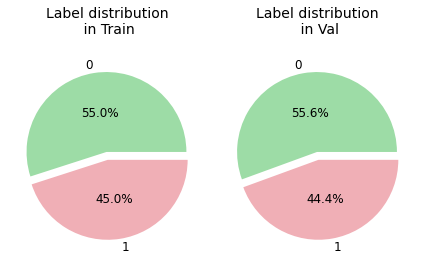

In [ ]:
plt.subplot(1,2,1)
colours = {'#9ddca6', '#f0afb6', '#eeb87c'}

plt.title('Label distribution\n in Train\n', fontsize=14)
plt.pie(questions_df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=questions_df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.subplot(1,2,2)

plt.title('Label distribution\n in Val\n', fontsize=14)
plt.pie(val_questions_df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=val_questions_df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


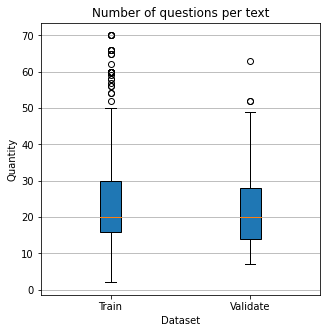

In [ ]:
datasets = ['Train', 'Validate']
fig, ax = plt.subplots(figsize=(5, 5))
ax.boxplot([
            questions_df['passage_id'].value_counts(sort=False),
            val_questions_df['passage_id'].value_counts(sort=False)
            ],
           labels=datasets,
           patch_artist=True)
ax.yaxis.grid(True)
ax.set_title('Number of questions per text')
ax.set_xlabel('Dataset')
ax.set_ylabel('Quantity')
plt.show()

## Number of correct answers per passage

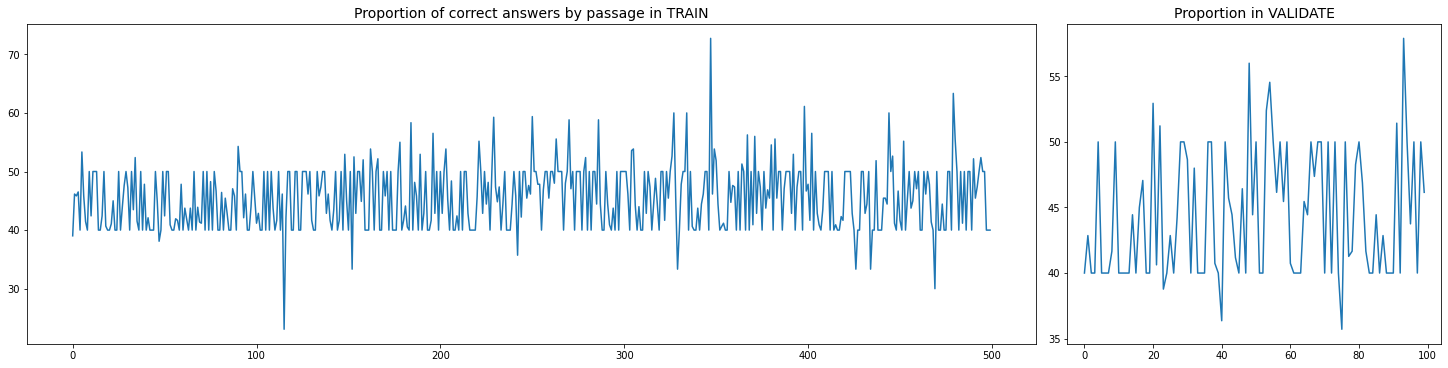

In [ ]:
label_distribution = []
label_distribution.append(questions_df[['passage_id', 'label']].value_counts(sort=False).to_frame())
label_distribution.append(val_questions_df[['passage_id', 'label']].value_counts(sort=False).to_frame())

correct = []
incorrect = []
proportion = []

for i, series in enumerate(label_distribution):
    label_distribution[i] = label_distribution[i].rename(columns={0:'counter'})
    label_distribution[i].reset_index(inplace=True)
    correct.append(label_distribution[i][label_distribution[i].label==1].counter.to_numpy())
    incorrect.append(label_distribution[i][label_distribution[i].label==0].counter.to_numpy())
    proportion.append((correct[i] / (incorrect[i]+correct[i])) * 100)

from matplotlib import ticker

fig = plt.figure(constrained_layout=True, figsize=(20,5))
gs = fig.add_gridspec(1, 5)
f_ax1 = fig.add_subplot(gs[0, :3])
f_ax1.set_title('Proportion of correct answers by passage in TRAIN', fontsize=14)
# f_ax1.yaxis.set_major_locator(ticker.MaxNLocator(4))
f_ax1.plot(proportion[0])
f_ax2 = fig.add_subplot(gs[0, 3:])
f_ax2.set_title('Proportion in VALIDATE', fontsize=14)
f_ax2.plot(proportion[1])

In [ ]:
import re
pd.set_option('display.max_rows', 100)

questions_df = questions_df.assign(answer_tokens=lambda x: x.answer.str.split())
questions_df['answer_len'] = questions_df['answer_tokens'].apply(len)

val_questions_df = val_questions_df.assign(answer_tokens=lambda x: x.answer.str.split())
val_questions_df['answer_len'] = val_questions_df['answer_tokens'].apply(len)

number of tokens is larger than 9

In [ ]:
questions_df[['label','answer_len', 'answer_tokens']][questions_df.answer_len > 9].label.value_counts()

1    1284
0     433
Name: label, dtype: int64

In [ ]:
val_questions_df[['label','answer_len', 'answer_tokens']][val_questions_df.answer_len > 9].label.value_counts()

1    240
0    105
Name: label, dtype: int64

number of tokens is fewer than 3

In [ ]:
questions_df[['label','answer_len']][questions_df.answer_len < 3].label.value_counts()

0    2797
1    1539
Name: label, dtype: int64

In [ ]:
val_questions_df[['label','answer_len']][val_questions_df.answer_len < 3].label.value_counts()

0    484
1    256
Name: label, dtype: int64

In [ ]:
questions_df[['label','answer_len', 'answer_tokens']][questions_df.answer_len == 2].label.value_counts()

0    1541
1     884
Name: label, dtype: int64

## Check intersection of lemmas between answers and passages

it seems that a complete intersection of an answer can be a trigger of its correctness

In [ ]:
from utils import RSG_MorphAnalyzer
morph = RSG_MorphAnalyzer()

**Train**

In [ ]:
passages_df['lemmas'] = morph.lemmantize_sentences(passages_df.passage.to_list())
questions_df['lemmas'] = morph.lemmantize_sentences(questions_df.answer.to_list())

In [ ]:
def compare_lemmas(row):
    passage_id = row['passage_id']
    answer_lemmas = row['lemmas']

    intersection = set(
        answer_lemmas
        ).intersection(
            set(passages_df.iloc[passage_id].lemmas))
        
    length = len(intersection)

    return (length == len(answer_lemmas),
            length == 0,
            length == 1,
            length > 6 # larger than mean length of answers
            )

questions_df[[
              'overlap',
              'no_intersect',
              'little overlap',
              'much overlap'
              ]] = questions_df[
                                ['lemmas', 'passage_id']
                                ].apply(
                                    compare_lemmas,
                                    axis=1,
                                    result_type="expand")

total overlap in train

In [ ]:
questions_df[['label','overlap']][questions_df.overlap == True].label.value_counts()

1    3003
0    2366
Name: label, dtype: int64

no intersecting lemmas in train

In [ ]:
questions_df[['label','no_intersect']][questions_df.no_intersect == True].label.value_counts()

0    966
1    159
Name: label, dtype: int64

little overlap in train

In [ ]:
questions_df[['label','little overlap']][questions_df['little overlap'] == True].label.value_counts()

0    1534
1     731
Name: label, dtype: int64

much overlap in train

In [ ]:
questions_df[['label','much overlap']][questions_df['much overlap'] == True].label.value_counts()

1    1672
0     594
Name: label, dtype: int64

**Validate**

In [ ]:
val_passages_df['lemmas'] = morph.lemmantize_sentences(val_passages_df.passage.to_list())
val_questions_df['lemmas'] = morph.lemmantize_sentences(val_questions_df.answer.to_list())

TOTAL OVERLAP

In [ ]:
def compare_lemmas(row):
    passage_id = row['passage_id']
    answer_lemmas = row['lemmas']

    intersection = set(
        answer_lemmas
        ).intersection(
            set(val_passages_df.iloc[passage_id].lemmas))

    length = len(intersection)

    return (length == len(answer_lemmas),
            length == 0,
            length == 1,
            length > 6 # larger than mean length of answers
            )

val_questions_df[[
              'overlap',
              'no_intersect',
              'little overlap',
              'much overlap'
              ]] = val_questions_df[
                                ['lemmas', 'passage_id']
                                ].apply(
                                    compare_lemmas,
                                    axis=1,
                                    result_type="expand")

In [ ]:
val_questions_df[['label','overlap']][val_questions_df.overlap == True].label.value_counts()

1    516
0    361
Name: label, dtype: int64

In [ ]:
val_questions_df[['label','no_intersect']][val_questions_df.no_intersect == True].label.value_counts()

0    197
1     24
Name: label, dtype: int64

In [ ]:
val_questions_df[['label','little overlap']][val_questions_df['little overlap'] == True].label.value_counts()

0    288
1    127
Name: label, dtype: int64

In [ ]:
val_questions_df[['label','much overlap']][val_questions_df['much overlap'] == True].label.value_counts()

1    312
0    110
Name: label, dtype: int64